# BUSINESS PROBLEM.
#The project focuses on how home renovations might increase the estimated value of their homes, and by what amount.

In [9]:
# importing necessary python libraries.
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
# Loading the dataset.
kc_house = pd.read_csv('kc_house_data.csv')
kc_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [11]:
# Loading first five rows of the dataset
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
# Information on dataset
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [13]:
# Description of the dataset
kc_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
kc_house.price.describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [15]:
kc_house.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [16]:
kc_house.bathrooms.describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [17]:
# DATA CLEANING.
kc_house.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
missing_value = ['N/a','na',np.nan]
kc_house = pd.read_csv('kc_house_data.csv',na_values=missing_value)


In [19]:
kc_house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
kc_house.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above        True
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

<Axes: >

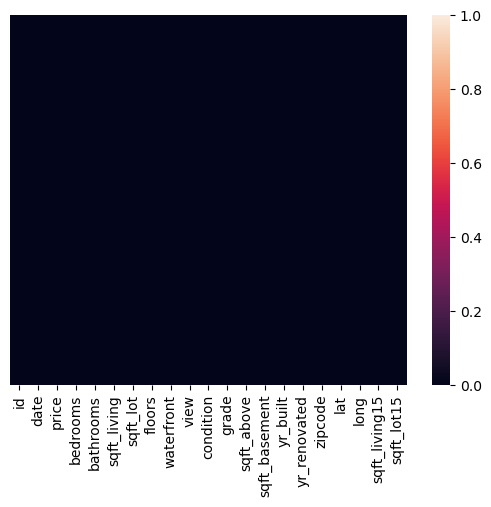

In [21]:
# VISUALIZING MISSING VALUES IN THE DATASET.
sns.heatmap(kc_house.isnull(), yticklabels=False)

In [22]:
# FILLING MISSING VALUE WITH 0.
kc_house.fillna(0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


# IDENTIFYING OF OUTLIER'S.

<Axes: >

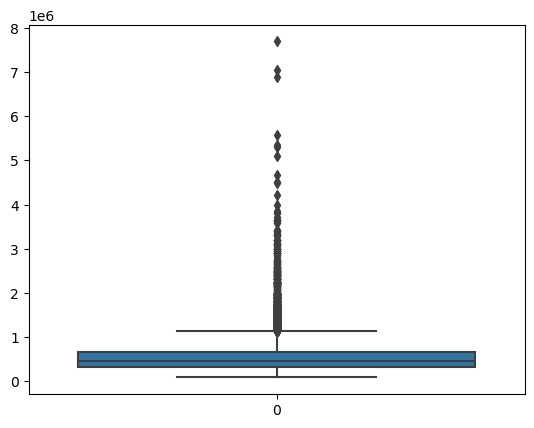

In [23]:
sns.boxplot(kc_house['price'])

<Axes: >

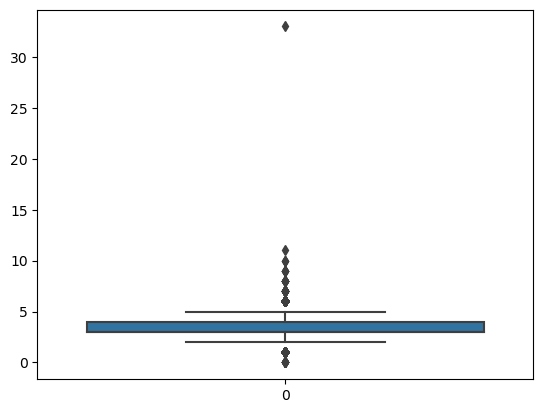

In [24]:
sns.boxplot(kc_house['bedrooms'])

<Axes: >

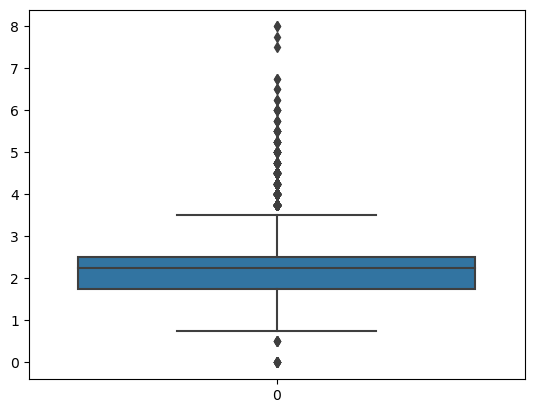

In [25]:
sns.boxplot(kc_house['bathrooms'])

<Axes: >

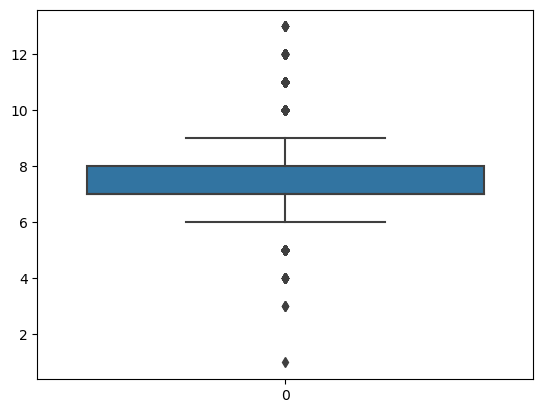

In [26]:
sns.boxplot(kc_house['grade'])

<Axes: >

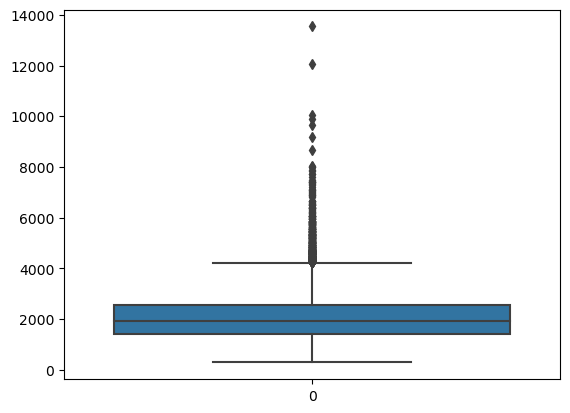

In [27]:
sns.boxplot(kc_house['sqft_living'])

## REMOVING OUTLIER'S.

In [20]:
# finding a limit for price
upper_limit= kc_house['price'].mean()+3*kc_house['price'].std()
lower_limit= kc_house['price'].mean()-3*kc_house['price'].std() 
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 1642268.853947348
lower_limit: -561904.5363607104


In [21]:
#finding a linit for bedrooms
upper_limit = kc_house['bedrooms'].mean()+3*kc_house['bedrooms'].std()
lower_limit = kc_house['bedrooms'].mean()-3*kc_house['bedrooms'].std()
print('upper_limit;', upper_limit)
print('lower_limit:', lower_limit)

upper_limit; 6.1610271165396
lower_limit: 0.58065612965482


In [22]:
upper_limit = kc_house['bathrooms'].mean()+3*kc_house['bathrooms'].std()
lower_limit = kc_house['bathrooms'].mean()-3*kc_house['bathrooms'].std()
print('upper_limit;', upper_limit)
print('lower_limit:', lower_limit)

upper_limit; 4.425246793635326
lower_limit: -0.19573214967104535


In [40]:
upper_limit = kc_house['grade'].mean()+3*kc_house['grade'].std()
lower_limit = kc_house['grade'].mean()-3*kc_house['grade'].std()
print('upper_limit;', upper_limit)
print('lower_limit:', lower_limit)

upper_limit; 11.18324944910271
lower_limit: 4.1304969072568865


In [41]:
upper_limit = kc_house['sqft_living'].mean()+3*kc_house['sqft_living'].std()
lower_limit = kc_house['sqft_living'].mean()-3*kc_house['sqft_living'].std()
print('upper_limit;', upper_limit)
print('lower_limit:', lower_limit)

upper_limit; 4835.222427410272
lower_limit: -675.4229548705971


# EXPLORATORY DATA ANALYSIS.

<Axes: ylabel='price'>

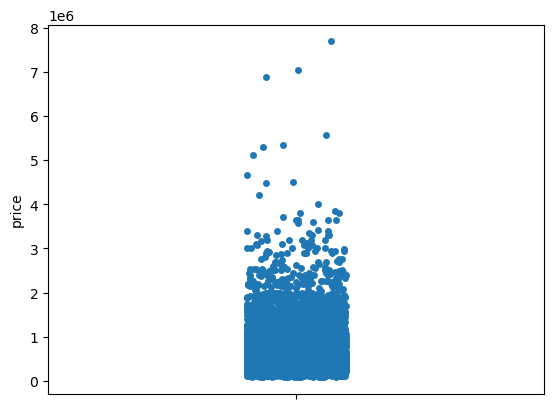

In [3]:
# Univariate data analysis.(#distance between the data point and mean is closer.)
sns.stripplot(kc_house['price'])

<Axes: xlabel='bedrooms', ylabel='price'>

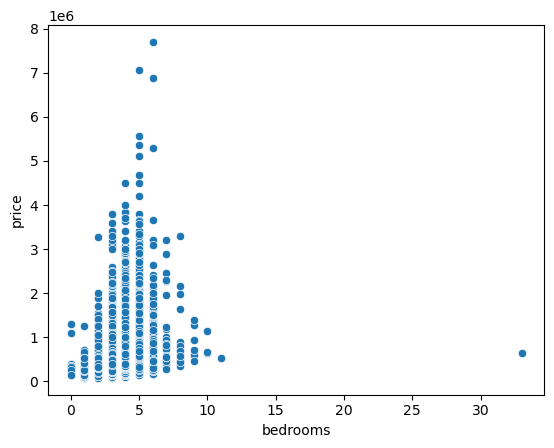

In [11]:
#BIVARIATE DATA ANALYSIS. # there's a positive correlation.
sns.scatterplot(data=kc_house, x='bedrooms', y='price')

<Axes: xlabel='bathrooms', ylabel='price'>

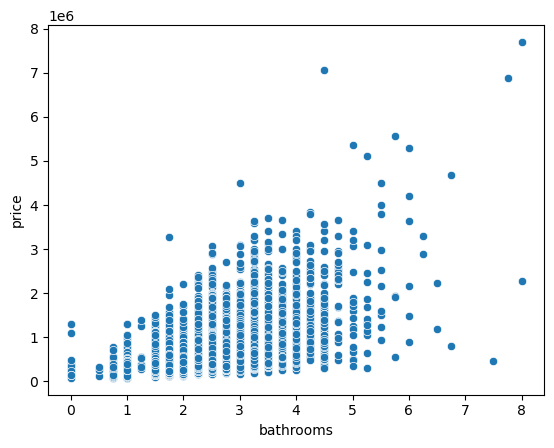

In [13]:
sns.scatterplot(data=kc_house, x='bathrooms', y='price') # positive correlation

<Axes: xlabel='grade', ylabel='price'>

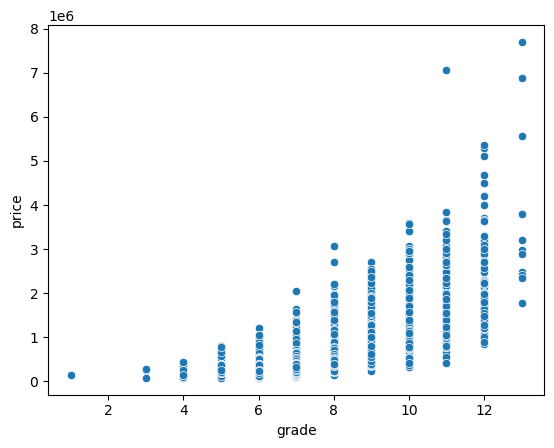

In [14]:
sns.scatterplot(data=kc_house, x='grade', y='price') # positive correlation

<Axes: xlabel='yr_built', ylabel='price'>

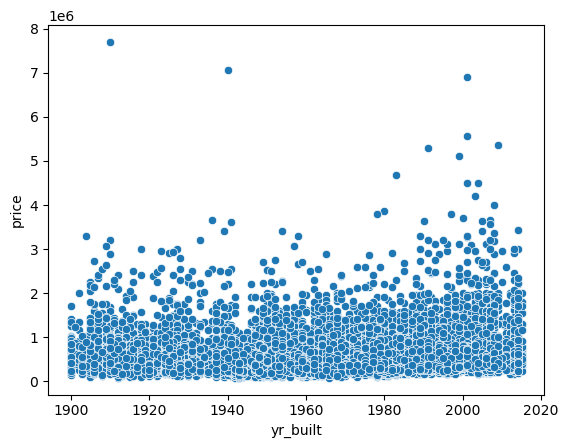

In [17]:
sns.scatterplot(data=kc_house, x='yr_built', y='price') # negative correlation

<Axes: xlabel='floors', ylabel='price'>

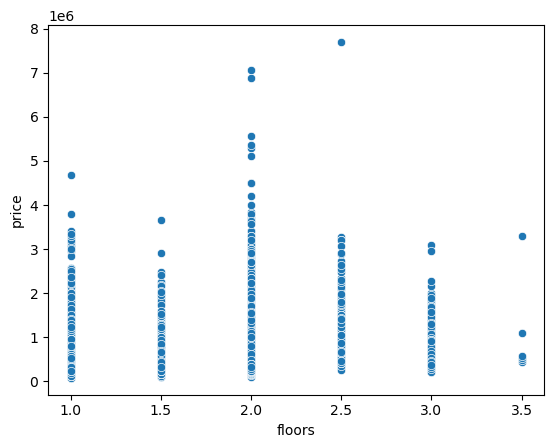

In [29]:
sns.scatterplot(data=kc_house, x='floors', y='price')

<Axes: xlabel='sqft_living', ylabel='price'>

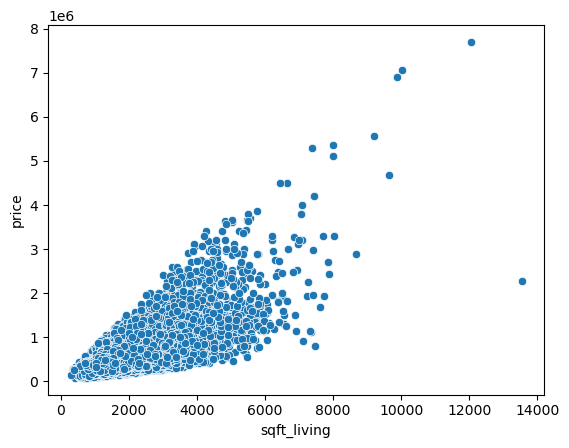

In [30]:
sns.scatterplot(data=kc_house, x='sqft_living', y='price')

<Axes: xlabel='sqft_lot', ylabel='price'>

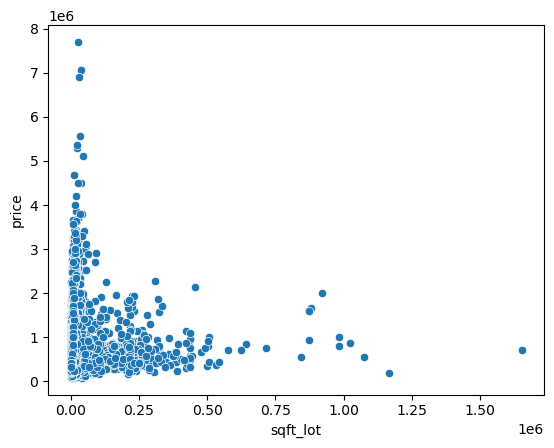

In [31]:
sns.scatterplot(data=kc_house, x='sqft_lot', y='price')